<h2 align='center'> Sales Analysis of a electronic Store <h2>
<h2 align='center'> FDS PROJECT <h2>
<BR>
<BR>
<BR>

<table align='left'>
    <tr >
        <td>Balasani Dheeraj Redddy</td>
        <td>AM.EN.U4CSE20115</td>
    </tr>
    <tr>
        <td>Vanguru Vekata Varun Kumar Reddy</td>
        <td>AM.EN.U4CSE20172</td>
    </tr>
    <tr>
        <td>Chinthakuntla Purushottam Reddy</td>
        <td>AM.EN.U4CSE20120</td>
    </tr>
    <tr>
        <td>S N V V S Gowtham Tadavarthy</td>
        <td>AM.EN.U4CSE20160</td>
    </tr>
    <tr>
        <td>Joshua Wilson Philip</td>
        <td>AM.EN.U4CSE20135</td>
    </tr>
    <tr>
        <td>Maddipati Umesh Chandra</td>
        <td>AM.EN.U4CSE20142</td>
    </tr>

</table>

#### our dataset that contains information about orders placed at a store or online retailer. The dataset includes several important fields, such as the order ID, product name, quantity, price, order date, and purchase address. These fields provide valuable information about the products that were purchased, when they were purchased, and where the purchase was made.In our  project, we use this dataset to perform a variety of analyses. we analyze the sales data to understand the most popular products, the busiest times of year, and the geographic distribution of purchases. and also used unsupervised ml algoithms in data to identify trends and patterns in customer behavior, such as the most common products that are purchased together,and which time of day is busy with customers

#### Import necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### we have sales data of each month so we Merging data from all months into one csv

#### The code then loops through each file in files, reads the data from the file using pd.read_csv(), and concatenates it to a new DataFrame called all_months_data. Finally, the code writes all_months_data to a new CSV file called "all_data_copy.csv" using the to_csv() method. The index=False argument tells the method to write the data without creating an index column in the CSV file.

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    

#### Read in updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
all_data.shape

(186850, 6)

## Changing all columns data type from object to preferred types 

### Order Id -> int
### Product -> string 
### Quantity - int
### Price -> float 
### Purchase address -> string





### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

# Getting the count of empty cells in each column

In [6]:
mask = all_data.isna()
empty_cells_per_column = mask.sum()
print(empty_cells_per_column)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


### We don't have empty cells but we have a complete empty rows in our dataset so we removed the rows completely by dropna(how=all)

#### his code is checking for rows in the DataFrame all_data that contain NaN (not a number) values. The nan_df DataFrame is created by filtering all_data to only include rows where at least one column contains an NaN value. The head() method is then used to display the first few rows of nan_df.Next, the code removes any rows from all_data where all of the values are NaN. The dropna() method is used for this, with the how argument set to "all" to indicate that rows should only be removed if all of their values are NaN. Finally, the head() method is called on all_data to display the first few rows of the DataFrame after removing the rows with all NaN values.

In [7]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### we have some unecssary string values in data column so we removed them

##### This code is filtering the rows in the all_data DataFrame based on the values in the "Order Date" column. The str[0:2] indexer is used to extract the first two characters from each value in the "Order Date" column, and the resulting Series is compared to the string "Or" using the not equal to (!=) operator. This creates a Series of Boolean values, where True indicates that the first two characters of the corresponding "Order Date" value are not "Or" and False indicates that they are. This Series is then used as a condition to filter the rows of all_data. Only rows where the corresponding value in the Series is True will be included in the new DataFrame. This effectively removes any rows from all_data where the first two characters of the "Order Date" value are "Or".

In [8]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### changing column types for better calculations

##### The to_numeric() method is used to convert the values in the "Quantity Ordered" and "Price Each" columns from strings to numbers. The resulting Series of numbers is then assigned back to the "Quantity Ordered" and "Price Each" columns of all_data to replace the original string values. This allows for mathematical operations to be performed on these columns.

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Adding additional column (month) from date for better visualization

#### Add month column (method 1)

###### his code is extracting the month from the "Order Date" column of the all_data DataFrame and creating a new "Month" column. The str[0:2] indexer is used to extract the first two characters from each value in the "Order Date" column, which will be the month in the format "MM". This is then assigned to the "Month" column of all_data.Next, the data type of the "Month" column is changed from string to integer using the astype() method. This is necessary because the month values are currently stored as strings, but they need to be stored as integers in order to perform mathematical operations on them

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Add month column (method 2) :  Using "to_datetime" from that we extracted month value

#### this code is creating a new "Month 2" column in the all_data DataFrame that contains the month of the "Order Date" values. The to_datetime() method is used to convert the "Order Date" values to datetime objects, and the dt.month attribute is used to extract the month from each datetime object. This returns a Series of integers, where each value represents the month of the corresponding "Order Date" value.

#### This method of extracting the month from the "Order Date" values is slightly different from the previous example. Instead of using string indexing to extract the first two characters of the "Order Date" values, this code uses the to_datetime() method to convert the values to datetime objects, and then uses the dt.month attribute to extract the month. 

In [11]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


#### Extracting the city and state from address for grouping orders

##### This code is extracting the city and state from the "Purchase Address" column of the all_data DataFrame and creating two new columns: "City" and "State". To do this, the code defines two helper functions: get_city() and get_state().

##### The get_city() function takes an address as input and returns the city by splitting the address on the comma character (,) and taking the second element of the resulting list. The city name is then stripped of any leading or trailing white space using the strip() method.

##### The get_state() function works similarly, but it splits the address on the comma character and then splits the second element of the resulting list on the space character ( ). This gives a list of the city and state abbreviations, from which the state abbreviation is taken as the second element.

##### Once these helper functions are defined, the apply() method is called on the "Purchase Address" column of all_data to apply the get_city() and get_state() functions to each value in the column. This creates a new Series of city and state values, which is then assigned to the "City" column of all_data. Finally, the head() method is called on all_data to display the first few rows of the DataFrame, including the new "City" column.

In [12]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA)


# Exploring and understanding the dataset

## Grouping the orders by month and getting statistical info of sales

#### This allows for the total sales for each order to be calculated and stored in the DataFrame. It also allows for further analysis of the sales data, such as computing the total sales for each month or city.

In [13]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [14]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Month 2,Sales
Month,,,,
1,10903,1811768.38,9709,1822256.73
2,13449,2188884.72,23950,2202022.42
3,17005,2791207.83,45459,2807100.38
4,20558,3367671.02,73116,3390670.24
5,18667,3135125.13,82830,3152606.75
6,15253,2562025.61,81324,2577802.26
7,16072,2632539.56,100051,2647775.76
8,13448,2230345.42,95688,2244467.88
9,13109,2084992.09,104589,2097560.13


#### First, the range() function is used to create a sequence of numbers from 1 to 12, which represents the 12 months of the year. This is assigned to the months variable 

#### Next, the bar() method is called on the plt object to create a bar chart. The months variable is passed as the first argument to specify the x-axis values, and the second argument is an expression that computes the total sales for each month. This expression groups the all_data DataFrame by the "Month" column and sums the "Sales" column for each group. This returns a Series of total sales values, one for each month.

#### The xticks() method is then called on the plt object to set the x-axis tick labels to the values in the months variable. This ensures that the tick labels on the x-axis match the months of the year (1 to 12).

#### The ylabel() and xlabel() methods are used to set the y-axis and x-axis labels, respectively. Finally, the show() method is called on the plt object to display the bar chart. 

range(1, 13)


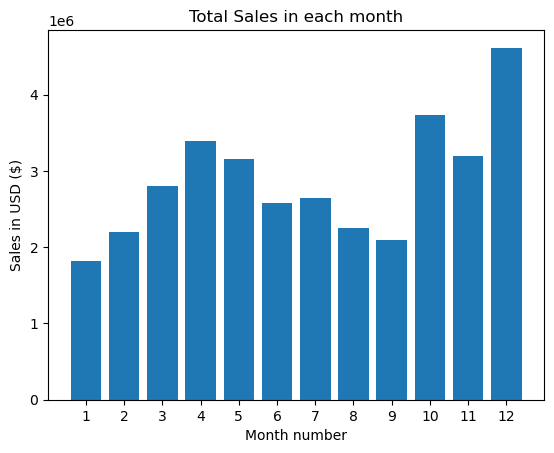

In [15]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)
plt.title("Total Sales in each month")
plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



### Grouping the orders by city and getting sales info of every city

####  the sum() method is called on the GroupBy object to compute the sum of the "Sales" column for each group. This returns a DataFrame containing the total sales for each city. The original DataFrame is not modified by the groupby() and sum() operations.

In [16]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Month 2,Sales
City,,,,,
Atlanta (GA),16602,2779908.20,104794,104794,2795498.58
Austin (TX),11153,1809873.61,69829,69829,1819581.75
Boston (MA),22528,3637409.77,141112,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,208325,5452570.80
New York City (NY),27932,4635370.83,175741,175741,4664317.43
Portland (ME),2750,447189.25,17144,17144,449758.27
Portland (OR),11303,1860558.22,70621,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,315520,8262203.91


###### First, a list comprehension is used to create a list of city names from the "City" column of the all_data DataFrame. The groupby() method is used to group the rows of all_data by the "City" column, and the resulting groups are looped over to extract the city names. These city names are then assigned to the keys variable.

###### Next, the bar() method is called on the plt object to create a bar chart. The keys variable is passed as the first argument to specify the x-axis values, and the second argument is an expression that computes the total sales for each city. This expression groups the all_data DataFrame by the "City" column and sums the "Sales" column for each group. This returns a Series of total sales values, one for each city.

###### The xticks() method is then called on the plt object to set the x-axis tick labels to the values in the keys variable. The rotation and size arguments are used to specify the rotation angle and font size of the tick labels, respectively. This ensures that the tick labels on the x-axis match the city names and are displayed vertically with a smaller font size.

###### The ylabel() and xlabel() methods are used to set the y-axis and x-axis labels, respectively. Finally, the show() method is called on the plt object to display the bar chart.

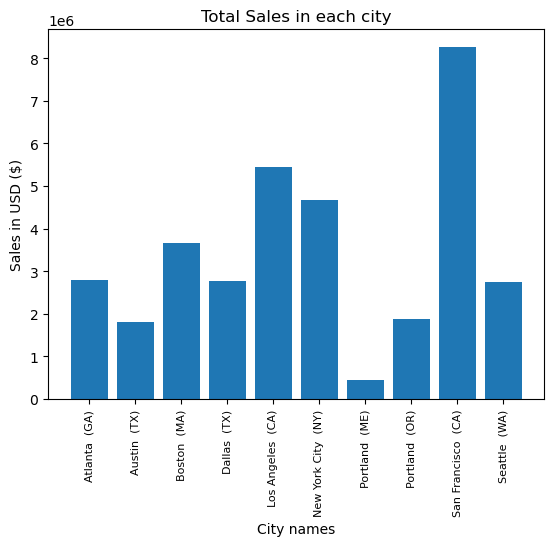

In [17]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]
plt.title("Total Sales in each city")
plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City names')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

## Finding the best time to advertise the product to reach most customers as per previous customer preferences

In [18]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,9,27,1


#### grouping a DataFrame all_data by the column 'Hour', and then using these keys to plot the count of sales for each hour on a graph. The x-axis of the graph will be labeled 'Hour', and the y-axis will be labeled 'count of sales'. The x-tick marks will be labeled with the values from the list of keys. The grid for the graph will be turned on, and the graph will be displayed using the show() function.

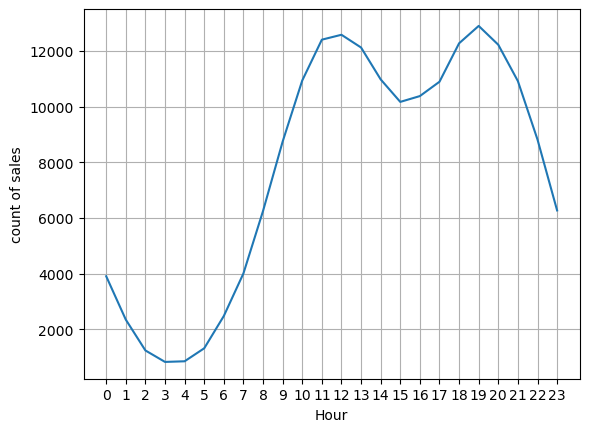

In [19]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.xlabel('Hour')
plt.ylabel('count of sales')
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

### Finding the most sold products together for showcasing them at the same place so that  customers may tend to buy the frequent items

##### This code creates a new DataFrame df by selecting only the rows from all_data where the values in the 'Order ID' column have duplicates. It then creates a new column in df called 'Grouped', which groups the values in the 'Product' column for each 'Order ID' and concatenates the values into a comma-separated string. Finally, the code creates a new DataFrame df2 by selecting only the 'Order ID' and 'Grouped' columns from df, and then dropping any remaining duplicate rows.

In [20]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\dheer\AppData\Local\Temp\ipykernel_7596\4067726271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.95,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,4,Boston (MA),99.99,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


##  Useing all combination to count the frequently bought items under the same order

In [22]:

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Finding which product sold most bys using aggregate functions

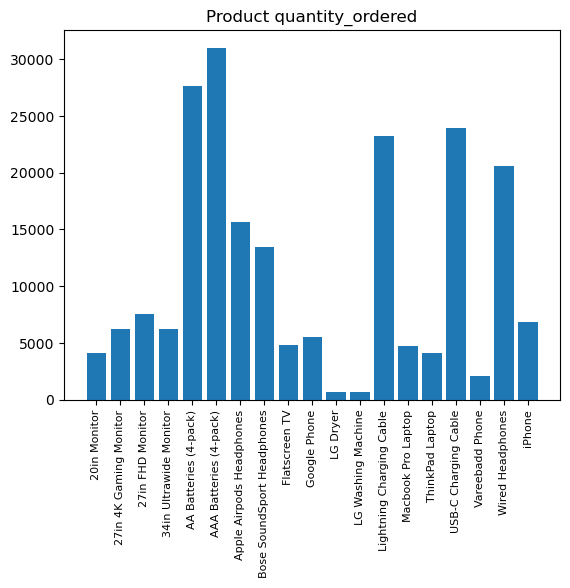

In [23]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
plt.title('Product quantity_ordered')
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


## We added the price subplot to previous bar chart so we can understand the sales frequency of product depending on prices

C:\Users\dheer\AppData\Local\Temp\ipykernel_7596\2132649559.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\dheer\AppData\Local\Temp\ipykernel_7596\2132649559.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


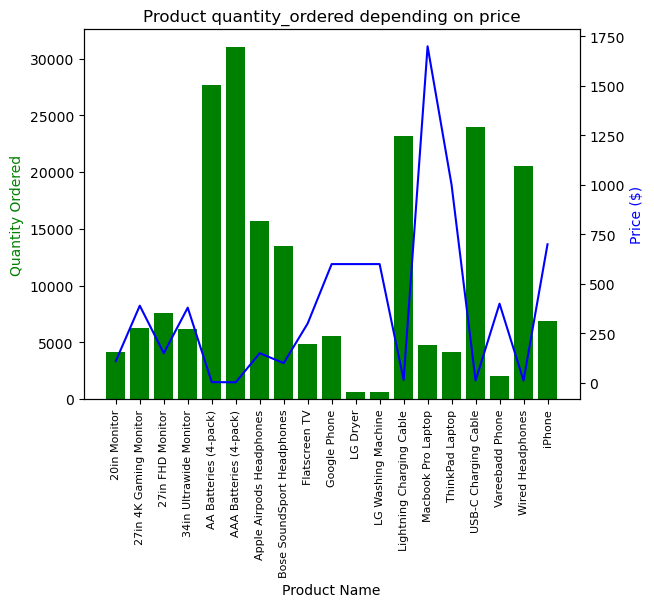

In [24]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
plt.title('Product quantity_ordered depending on price')
ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

## from the graph we get to know that most of our customers are midrange buyers so we can concentrate on mid range items on more for better sales

# UNSUPERVISED MACHINE LEARNING ALGORITHMS

# apriori algorithm to find most frequent items

### The Apriori algorithm is a popular algorithm for finding frequent itemsets in a dataset. It is a "bottom-up" approach, where frequent itemsets are found by combining smaller frequent itemsets. This approach is efficient because it reduces the search space by pruning infrequent itemsets. so we used to find frequent items bought

In [25]:
all_data['grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [26]:
df3 = all_data[['Order ID', 'grouped']].drop_duplicates()

In [27]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
lis = df3['grouped'].str.split(',').tolist()
te = TransactionEncoder()
te_ary = te.fit(lis).transform(lis)
te_ary
te_ary.astype("int")


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
import pandas as pd
clusterdf=pd.DataFrame(te_ary, columns=te.columns_)

In [29]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(clusterdf, use_colnames=True,  min_support=0.1)
frequent_itemsets

,support,itemsets
0,0.115122,(AA Batteries (4-pack))
1,0.115408,(AAA Batteries (4-pack))
2,0.121074,(Lightning Charging Cable)
3,0.122480,(USB-C Charging Cable)
4,0.105623,(Wired Headphones)


# "K-MEANS CLUSTERING" UNSUPERVISED ML ALGORITHM

## By using kmeans clustering we can cluster the counts of hours in your dataset, the results of the clustering can be used to identify groups of hours with similar counts from this clustering we can identify which hours of a day has high sales medium sales and low sales,by this we can adjust no of staff in particular times

In [30]:
from sklearn.cluster import KMeans
import numpy as np

# Extract the hour column and count the number of occurrences of each hour
hours, counts = np.unique(all_data['Hour'], return_counts=True)

# Fit the k-means model with 3 clusters
kmeans = KMeans(n_clusters=4).fit(counts.reshape(-1, 1))

# Get the cluster labels for each hour
clusters = kmeans.predict(counts.reshape(-1, 1))

# Print the cluster labels for each hour
print(clusters)

[0 2 2 2 2 2 2 0 0 1 1 3 3 3 1 1 1 1 3 3 3 1 1 0]


In [31]:
cluster_hours = dict(zip(hours, clusters))

# Print the cluster labels for each hour
for hour, cluster in cluster_hours.items():
    print(f'Hour {hour}: Cluster {cluster}')

Hour 0: Cluster 0
Hour 1: Cluster 2
Hour 2: Cluster 2
Hour 3: Cluster 2
Hour 4: Cluster 2
Hour 5: Cluster 2
Hour 6: Cluster 2
Hour 7: Cluster 0
Hour 8: Cluster 0
Hour 9: Cluster 1
Hour 10: Cluster 1
Hour 11: Cluster 3
Hour 12: Cluster 3
Hour 13: Cluster 3
Hour 14: Cluster 1
Hour 15: Cluster 1
Hour 16: Cluster 1
Hour 17: Cluster 1
Hour 18: Cluster 3
Hour 19: Cluster 3
Hour 20: Cluster 3
Hour 21: Cluster 1
Hour 22: Cluster 1
Hour 23: Cluster 0


### below graph show four clusters of hours
#### hour(1-6) low sales cluster
#### hour(7,8,23,23) average sales cluster
#### hour(9,10,14,15,16,17)above average sales cluster
#### hour(11,12,13,18,19,20)high sales cluster

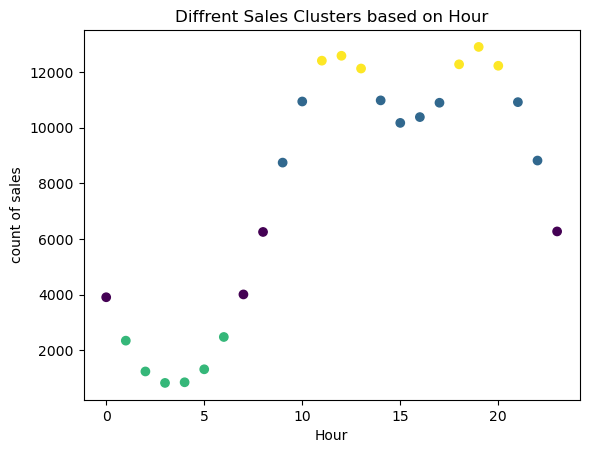

In [32]:
plt.scatter(hours, counts, c=clusters)
plt.title("Diffrent Sales Clusters based on Hour")
plt.xlabel('Hour')
plt.ylabel('count of sales')
plt.show()